In [1]:
%matplotlib inline
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pprint import pprint

In [2]:
df_md_list_price = pd.read_csv('Zillow CSV Files/City_MedianListingPrice_AllHomes.csv')
df_md_list_price.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,New York,NY,New York-Newark-Jersey City,Queens County,1,459000.0,449990.0,429900.0,430000.0,449000.0,...,845000.0,829000.0,799000.0,808000.0,850000.0,848000.0,835000.0,799999.5,825000.0,825000.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,430000.0,415000.0,429000.0,425000.0,426000.0,...,750000.0,775000.0,779000.0,795000.0,795000.0,799000.0,799000.0,799000.0,799000.0,799000.0
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,269900.0,274500.0,272500.0,272338.0,269000.0,...,294500.0,309500.0,324500.0,329000.0,326000.0,325000.0,324900.0,319900.0,324900.0,319998.0
3,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,149000.0,150000.0,155000.0,155000.0,155000.0,...,295250.0,299000.0,300000.0,304700.0,300000.0,299900.0,299000.0,295000.0,298000.0,297700.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,145000.0,147000.0,149000.0,149900.0,150944.0,...,233900.0,231499.5,229990.0,235000.0,239900.0,239900.0,239500.0,236000.0,236972.0,235000.0


In [3]:
df_aus_list_price = df_md_list_price.loc[
    (df_md_list_price["RegionName"] == "Austin") & 
    (df_md_list_price["State"] == "TX"), :]
df_aus_list_price

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
11,Austin,TX,Austin-Round Rock,Travis County,12,234500.0,234900.0,234000.0,235950.0,244900.0,...,377695.0,379900.0,387900.0,389000.0,389900.0,395000.0,395000.0,388442.5,384900.0,383245.0


In [4]:
df_aus_list_price = df_aus_list_price.loc[:, '2013-09'::3]
df_aus_list_price

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
11,289000.0,299000.0,331990.0,350000.0,345000.0,349687.5,359000.0,369900.0,360900.0,364900.0,...,385000.0,379500.0,372900.0,389900.0,399900.0,390000.0,382292.5,387900.0,395000.0,384900.0


In [5]:
df_aus_list_price = df_aus_list_price.transpose()
df_aus_lp_plot = df_aus_list_price.reset_index()

df_aus_lp_plot.rename(
    index=str,
    columns={11:'Austin Median List Price',
             'index': 'Years'},
    inplace=True)


In [6]:
df_aus_lp_plot

,Years,Austin Median List Price
0,2013-09,289000.0
1,2013-12,299000.0
2,2014-03,331990.0
3,2014-06,350000.0
4,2014-09,345000.0
5,2014-12,349687.5
6,2015-03,359000.0
7,2015-06,369900.0
8,2015-09,360900.0
9,2015-12,364900.0


In [7]:
df_natl_lp = df_md_list_price.loc[:,'2013-09'::3]
df_natl_lp.head()

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,419000.0,439000.0,450000.0,549000.0,535000.0,560000.0,579000.0,595000.0,658944.0,695000.0,...,729994.5,729000.0,735000.0,789000.0,864500.0,849000.0,850000.0,799000.0,848000.0,825000.0
1,550000.0,539000.0,549000.0,589000.0,595000.0,569000.0,599400.0,649900.0,650000.0,650000.0,...,699999.0,699000.0,699999.0,725000.0,749000.0,739388.5,749000.0,779000.0,799000.0,799000.0
2,239000.0,219000.0,249900.0,269900.0,259000.0,239900.0,259000.0,265000.0,254900.0,244900.0,...,280000.0,279000.0,263000.0,299000.0,305000.0,299900.0,285000.0,324500.0,325000.0,324900.0
3,175222.0,177500.0,197250.0,215000.0,215000.0,239900.0,278500.0,275000.0,295000.0,299900.0,...,301900.0,298700.0,286995.0,288992.5,295000.0,290000.0,290495.0,300000.0,299900.0,298000.0
4,182490.0,188119.0,197995.0,199900.0,199000.0,205358.5,213945.0,229000.0,235995.0,230000.0,...,230000.0,225000.0,227445.0,238000.0,245000.0,242990.0,233835.5,229990.0,239900.0,236972.0


In [8]:
df_natl_lp_avg = pd.DataFrame(df_natl_lp.mean())
df_natl_lp_avg

,0
2013-09,262242.740611
2013-12,262678.462294
2014-03,268351.771611
2014-06,275946.035764
2014-09,276242.207688
2014-12,276123.861450
2015-03,282796.953868
2015-06,287963.609976
2015-09,290085.340441
2015-12,291602.598950


In [9]:
df_natl_lp_plot = df_natl_lp_avg.reset_index()

df_natl_lp_plot.rename(
    index=str,
    columns={0:'National Median List Price',
             'index': 'Years'},
    inplace=True)
df_natl_lp_plot

,Years,National Median List Price
0,2013-09,262242.740611
1,2013-12,262678.462294
2,2014-03,268351.771611
3,2014-06,275946.035764
4,2014-09,276242.207688
5,2014-12,276123.861450
6,2015-03,282796.953868
7,2015-06,287963.609976
8,2015-09,290085.340441
9,2015-12,291602.598950


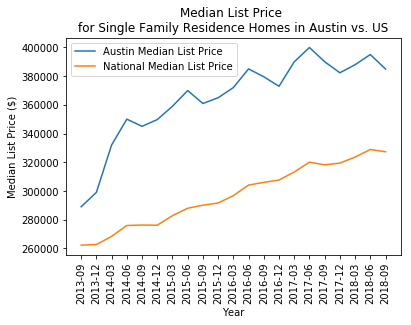

In [10]:
x_axis = np.arange(0, len(df_aus_lp_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_aus_lp_plot['Years'], rotation=90)    
    
plt.plot(x_axis, df_aus_lp_plot['Austin Median List Price'])
plt.plot(x_axis, df_natl_lp_plot['National Median List Price'])


plt.xlabel('Year')
plt.ylabel('Median List Price ($)')
plt.title('Median List Price \n'
            'for Single Family Residence Homes in Austin vs. US')


plt.legend(loc='best')
plt.savefig('Rental Plots/Median List Price_SFR_Aus_v_US.png', bbox_inches='tight')


In [11]:
plt.show()

In [12]:
df_zhvi_list_price = pd.read_csv('Zillow CSV Files/City_Zhvi_SingleFamilyResidence.csv')
df_zhvi_list_price.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,171900.0,172100.0,172400.0,172500.0,...,566900,573300,579800,585000,590000,594100,597400,599800,604600,610300
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,166400.0,165900.0,165500.0,164900.0,...,697700,704900,709800,711700,712500,713300,714500,716100,718600,721800
2,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,112000.0,113100.0,113900.0,114300.0,...,201200,203700,205600,207200,208500,208800,208800,209400,210200,211200
3,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,89100.0,89000.0,89000.0,89200.0,...,180500,182200,183600,184800,185800,186700,187700,188600,189400,190000
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,87300.0,87100.0,87000.0,86800.0,...,163100,165100,166700,167500,168000,168900,169900,170800,172000,173100


In [13]:
df_aus_zhvi = df_zhvi_list_price.loc[
    (df_zhvi_list_price["RegionName"] == "Austin") & 
    (df_zhvi_list_price["State"] == "TX"), :]
df_aus_zhvi

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
11,10221,Austin,TX,Austin-Round Rock,Travis County,12,169800.0,169900.0,170800.0,172100.0,...,349700,354300,357900,359300,360000,361200,363000,364900,367200,369300


In [14]:
df_aus_zhvi = df_aus_zhvi.loc[:,'2013-09'::3]
df_aus_zhvi.head()

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
11,244500.0,248800.0,252100.0,257600.0,265200.0,270600.0,277600,286700,292700,296100,...,310000,316700,322800,328300,335200,337400,345800,357900,361200,367200


In [15]:
df_aus_zhvi = df_aus_zhvi.transpose()
df_aus_zhvi_plot = df_aus_zhvi.reset_index()

df_aus_zhvi_plot.rename(
    index=str,
    columns={11:'Austin Zillow Home Value Index',
             'index': 'Years'},
    inplace=True)
df_aus_zhvi_plot

,Years,Austin Zillow Home Value Index
0,2013-09,244500.0
1,2013-12,248800.0
2,2014-03,252100.0
3,2014-06,257600.0
4,2014-09,265200.0
5,2014-12,270600.0
6,2015-03,277600.0
7,2015-06,286700.0
8,2015-09,292700.0
9,2015-12,296100.0


In [16]:
df_natl_zhvi = df_zhvi_list_price.loc[:,'2013-09'::3]
df_natl_zhvi.head()

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,424700.0,429600.0,436100.0,442500.0,452900.0,460800.0,468600,472900,478700,487500,...,501300,508700,521500,530300,541500,553600,561900,579800,594100,604600
1,487600.0,498200.0,509100.0,522200.0,532400.0,538500.0,552400,562200,571900,584700,...,607900,626100,641700,652900,663000,676900,691500,709800,713300,718600
2,157900.0,159200.0,160000.0,162600.0,164800.0,165500.0,167300,171300,172800,175800,...,180300,183700,188000,189400,190500,193100,198700,205600,208800,210200
3,126200.0,128600.0,130100.0,133200.0,135700.0,139200.0,142200,145400,148000,150800,...,159400,164900,169100,172500,174900,176400,179100,183600,186700,189400
4,120300.0,122000.0,123000.0,124400.0,126300.0,128500.0,130600,133100,135700,138000,...,142400,145100,148000,152100,156400,158600,161600,166700,168900,172000


In [17]:
df_natl_zhvi_avg = pd.DataFrame(df_natl_zhvi.mean())
df_natl_zhvi_avg

,0
2013-09,199644.216668
2013-12,202201.293069
2014-03,204336.210692
2014-06,206596.273585
2014-09,208486.340125
2014-12,210736.763323
2015-03,212953.059311
2015-06,215762.389623
2015-09,218600.421974
2015-12,221129.866375


In [18]:
df_natl_zhvi_plot = df_natl_zhvi_avg.reset_index()

df_natl_zhvi_plot.rename(
    index=str,
    columns={0:'National Zillow Home Value Index',
             'index': 'Years'},
    inplace=True)
df_natl_zhvi_plot

,Years,National Zillow Home Value Index
0,2013-09,199644.216668
1,2013-12,202201.293069
2,2014-03,204336.210692
3,2014-06,206596.273585
4,2014-09,208486.340125
5,2014-12,210736.763323
6,2015-03,212953.059311
7,2015-06,215762.389623
8,2015-09,218600.421974
9,2015-12,221129.866375


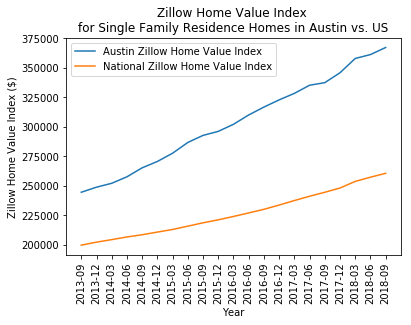

In [19]:
x_axis = np.arange(0, len(df_aus_zhvi_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_aus_zhvi_plot['Years'], rotation=90)    
    
plt.plot(x_axis, df_aus_zhvi_plot['Austin Zillow Home Value Index'])
plt.plot(x_axis, df_natl_zhvi_plot['National Zillow Home Value Index'])


plt.xlabel('Year')
plt.ylabel('Zillow Home Value Index ($)')
plt.title('Zillow Home Value Index \n'
            'for Single Family Residence Homes in Austin vs. US')


plt.legend(loc='best')
plt.savefig('Rental Plots/ZHVI_SFR_Aus_v_US.png', bbox_inches='tight')


In [20]:
plt.show()

In [21]:
df_st_md_list_price = pd.read_csv('Zillow CSV Files/State_MedianListingPrice_AllHomes.csv')
df_st_md_list_price.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,California,1,330777.0,335000.0,337900.0,339900.0,342500.0,345000.0,339900.0,339900.0,...,499000.0,509000,524900.0,532000.0,539900.0,548000.0,540000.0,538000,539095.0,539000.0
1,Texas,2,169900.0,169900.0,169900.0,170000.0,174000.0,174900.0,169990.0,169900.0,...,269900.0,271500,275000.0,279624.0,280000.0,280000.0,279900.0,275000,275000.0,274990.0
2,New York,3,349000.0,345000.0,344900.0,339000.0,349000.0,349000.0,347000.0,339900.0,...,354017.5,382400,389000.0,388350.0,387208.5,385000.0,375000.0,369000,375000.0,379000.0
3,Florida,4,199900.0,199700.0,199000.0,194900.0,190000.0,188500.0,184900.0,180000.0,...,287500.0,289000,289640.0,290000.0,293900.0,294900.0,290999.0,289900,289900.0,289900.0
4,Illinois,5,214900.0,214900.0,215000.0,214900.0,213900.0,210000.0,200000.0,199900.0,...,209900.0,219900,229000.0,235000.0,235990.0,237000.0,234900.0,230000,229900.0,229900.0


In [22]:
df_tx_md_lp = df_st_md_list_price.loc[
    (df_st_md_list_price["RegionName"] == "Texas"), :]
df_tx_md_lp = df_tx_md_lp.loc[:, '2013-09'::3]
df_tx_md_lp

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
1,190000.0,191500.0,201450.0,213484.0,218990.0,225000.0,239900.0,245000.0,249490.0,255990.0,...,259500.0,257000.0,255000.0,265000.0,275000.0,269900.0,269700.0,275000.0,280000.0,275000.0


In [23]:
df_tx_md_lp = df_tx_md_lp.transpose()
df_tx_md_lp_plot = df_tx_md_lp.reset_index()

df_tx_md_lp_plot.rename(
    index=str,
    columns={1:'Texas Median List Price',
             'index': 'Years'},
    inplace=True)

df_tx_md_lp_plot

,Years,Texas Median List Price
0,2013-09,190000.0
1,2013-12,191500.0
2,2014-03,201450.0
3,2014-06,213484.0
4,2014-09,218990.0
5,2014-12,225000.0
6,2015-03,239900.0
7,2015-06,245000.0
8,2015-09,249490.0
9,2015-12,255990.0


In [24]:
df_natl_md_lp = df_st_md_list_price.loc[:,'2013-09'::3]
df_natl_md_lp.dropna(inplace=True)
df_natl_md_lp

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,415000.0,399000.0,410000.0,435000.0,425000.0,399900.0,426900.0,450000.0,455000.0,449900.0,...,495000.0,489000.0,475000.0,499000.0,515000.0,509900.0,499000.0,524900.0,548000.0,539095.0
1,190000.0,191500.0,201450.0,213484.0,218990.0,225000.0,239900.0,245000.0,249490.0,255990.0,...,259500.0,257000.0,255000.0,265000.0,275000.0,269900.0,269700.0,275000.0,280000.0,275000.0
2,293650.0,299990.0,323500.0,329000.0,319900.0,325000.0,334990.0,339000.0,319000.0,320000.0,...,349000.0,325000.0,334900.0,355000.0,349000.0,339900.0,349000.0,389000.0,385000.0,375000.0
3,199900.0,200900.0,211494.5,210000.0,219900.0,224900.0,228990.0,234000.0,245000.0,250000.0,...,260000.0,261000.0,268700.0,277000.0,282990.0,284990.0,285500.0,289640.0,294900.0,289900.0
4,169900.0,159900.0,174900.0,191000.0,185000.0,175000.0,189900.0,204900.0,197000.0,185000.0,...,215000.0,200000.0,190000.0,214900.0,227445.0,219900.0,208600.0,229000.0,237000.0,229900.0
5,174500.0,174900.0,174900.0,184000.0,178900.0,174900.0,179900.0,185000.0,182900.0,174900.0,...,189900.0,179999.0,177990.0,190000.0,199000.0,192500.0,189900.0,199900.0,215000.0,204900.0
6,125000.0,122000.0,129500.0,137900.0,134500.0,129000.0,134900.0,139900.0,139500.0,130000.0,...,147900.0,144769.5,138900.0,147500.0,159900.0,155900.0,149900.0,159000.0,169900.0,168000.0
7,129900.0,120000.0,125000.0,139900.0,139900.0,129900.0,135000.0,149900.0,145000.0,139000.0,...,155000.0,154900.0,149900.0,159900.0,174900.0,169900.0,164900.0,170000.0,185000.0,180000.0
8,179900.0,175000.0,180000.0,194500.0,189400.0,185000.0,189900.0,199000.0,199900.0,199900.0,...,219900.0,219000.0,215000.0,225000.0,239114.5,239900.0,239900.0,249900.0,259000.0,251159.0
9,195900.0,194900.0,198000.0,199900.0,199900.0,199000.0,199990.0,219000.0,217595.0,216990.0,...,229900.0,229900.0,229900.0,238990.0,250000.0,250000.0,254000.0,259900.0,263990.0,260000.0


In [25]:
df_natl_md_lp = df_natl_md_lp.mean()
df_natl_md_lp = df_natl_md_lp.transpose()
df_natl_md_lp_plot = df_natl_md_lp.reset_index()

df_natl_md_lp_plot.rename(
    index=str,
    columns={0:'National Median List Price',
             'index': 'Years'},
    inplace=True)

df_natl_md_lp_plot

,Years,National Median List Price
0,2013-09,215769.71
1,2013-12,212338.20
2,2014-03,218067.81
3,2014-06,227201.84
4,2014-09,226055.48
5,2014-12,221733.16
6,2015-03,228622.25
7,2015-06,239773.90
8,2015-09,239499.48
9,2015-12,236572.57


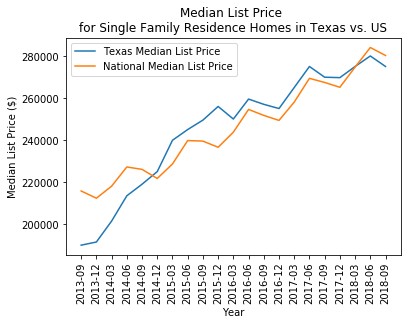

In [26]:
x_axis = np.arange(0, len(df_tx_md_lp_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_tx_md_lp_plot['Years'], rotation=90)    
    
plt.plot(x_axis, df_tx_md_lp_plot['Texas Median List Price'])
plt.plot(x_axis, df_natl_md_lp_plot['National Median List Price'])


plt.xlabel('Year')
plt.ylabel('Median List Price ($)')
plt.title('Median List Price \n'
            'for Single Family Residence Homes in Texas vs. US')


plt.legend(loc='best')
plt.savefig('Rental Plots/MedianListPrice_SFR_TX_v_US.png', bbox_inches='tight')


In [27]:
plt.show()